In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

In [30]:
data=pd.read_csv("Concrete_Dataset.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [31]:
data.columns=['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [33]:
data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

In [34]:
data['Water_Cement_ratio']=data['Water']/data['Cement']

In [35]:
data=data[['Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Water_Cement_ratio',
       'Blast_Furnace_Slag', 'Fly_Ash',
       'Concrete_compressive_strength']]

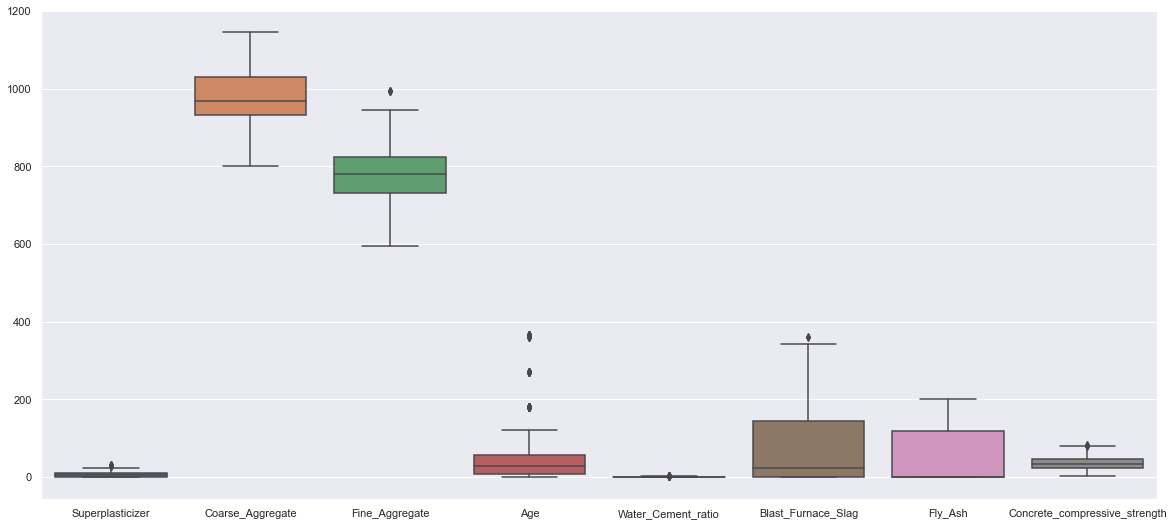

In [36]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,9)})
ax=sns.boxplot(x=None,y=None,data=data)

In [37]:
from scipy import stats 
outlier_list=[]
for c in data.columns[:-1]:
          q1=data[c].quantile(q=0.30)
          q2=data[c].quantile(q=0.75)
          L_outliers=q1-1.5*(q2-q1)
          R_outliers=q2+1.5*(q2-q1)
          outlier_list.extend(data[(data[c]<L_outliers) | (data[c]>R_outliers)].index) 
data.loc[list(set(outlier_list))]
data_outliers=data.drop(outlier_list,axis=0).reset_index(drop=True)  

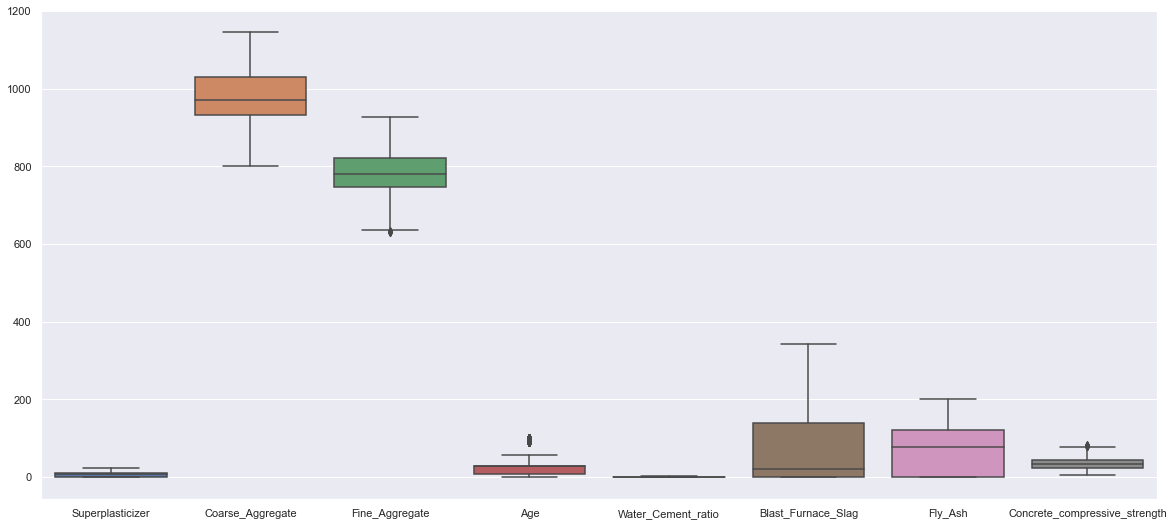

In [38]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,9)})
ax=sns.boxplot(x=None,y=None,data=data_outliers)

In [39]:
data=data_outliers
data.head()
X=data.drop('Concrete_compressive_strength',axis=1)
y=data['Concrete_compressive_strength']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.26,random_state=100)

In [41]:
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBRegressor
model=XGBRegressor(random_state=2,learning_rate = 0.2,
                max_depth = 2, n_estimators = 800,n_jobs=-1,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)
param_grid=dict()
Gridsearchmodel=GridSearchCV(model,param_grid=param_grid,cv=5,return_train_score=True)

In [42]:
Gridsearchmodel.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=0.9, colsample_bynode=0.9,
                                    colsample_bytree=0.9,
                                    enable_categorical=False, gamma=0.1,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.2, max_delta_step=None,
                                    max_depth=2, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=800, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2, reg_alpha=0.005,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=0.7, tree

In [43]:
best_model=Gridsearchmodel.best_estimator_
best_model.fit(X_train,y_train)
y_train_pred_xg=best_model.predict(X_train)
y_test_pred_xg=best_model.predict(X_test)
print ('Train score: ',best_model.score(X_train,y_train))
print ('Test score: ',best_model.score(X_test,y_test))

Train score:  0.9791011339052501
Test score:  0.9443939071128801


In [44]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=80, n_estimators=400, n_jobs=-1)

In [45]:
y_pred=rf.predict(X_test)
from sklearn.metrics import r2_score
R2_score=r2_score(y_test,y_pred)
y_train_pred=rf.predict(X_train)
R2_score1=r2_score(y_train,y_train_pred)
print(R2_score1,R2_score)

0.9825595840968219 0.9180047234669764


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None,
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
param_grid=dict()
Gridsearchmodel=GridSearchCV(model,param_grid=param_grid,cv=5,return_train_score=True)

In [49]:
model2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=4, random_state=42)

In [50]:
y_pred_grad_test=model2.predict(X_test)
R2_score_grad=r2_score(y_test,y_pred_grad_test)
y_pred_grad_train=model2.predict(X_train)
R2_score_grad_train=r2_score(y_train,y_pred_grad_train)
R2_score_grad_train
R2_score_grad

0.9428058293298357

In [52]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

def mae(predictions,targets):
  return np.mean((targets-predictions)**2)

In [53]:
# this is the rmse of Xgboot
rmse_train=rmse(y_pred_grad_train,y_train)
rmse_test=rmse(y_pred_grad_test,y_test)
# rmse_test
# rmse_train

In [54]:
mae_train=mae(y_train_pred,y_train)
mae_test=mae(y_pred,y_test)
mae_test
# mae_train

22.826832596927087